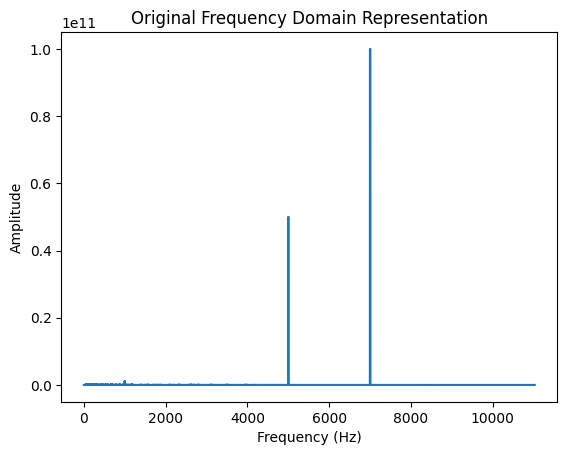

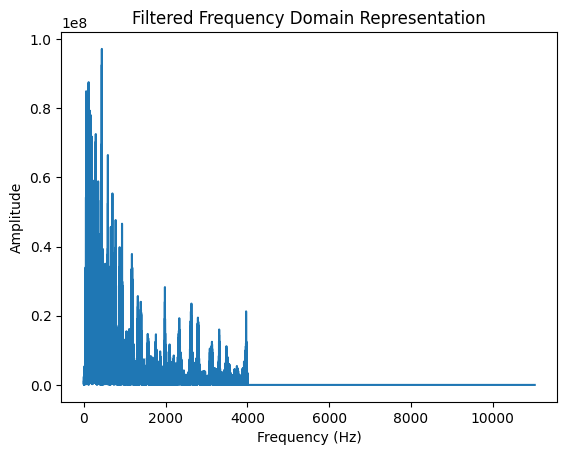

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import scipy.fft as sp_fft
import scipy.signal as sp_signal


# read voice file and return amplitude and frequency
def read_voice(path):
    rate, data = wavfile.read(path)
    Amplitude = sp_fft.rfft(data)
    Frequency = sp_fft.rfftfreq(len(data), 1 / rate)
    return rate, data, Amplitude, Frequency

# change voice speed by changing the rate
def change_voice_speed(data, rate, speed_factor):
    speed_factor = np.sqrt(speed_factor)
    new_rate = int(rate * speed_factor)
    # Resample the data to change its length
    new_length = int(len(data) / speed_factor)
    new_data = sp_signal.resample(data, new_length)
    return new_data, new_rate


# low pass filter to remove noise from voice
def low_pass_filter(Frequency, Amplitude, cutoff):
    filtered_amplitude = Amplitude.copy()
    filtered_amplitude[Frequency > cutoff] = 0
    filtered_amplitude[np.abs(Amplitude) > 1e8] = 0
    return filtered_amplitude


# reverse the voice to play it backwards
def reverse_voice(data, rate):
    return data[::-1], rate  # reverse the data


# combine audio files
def mix_voices(DataArray, RatesArray):
    # find the maximum rate
    max_rate = max(RatesArray)
    # find the maximum length
    max_len = max([len(data) for data in DataArray])
    # resample all the data to the maximum rate
    for i in range(len(DataArray)):
        DataArray[i] = sp_signal.resample(
            DataArray[i], int(len(DataArray[i]) * max_rate / RatesArray[i])
        )
    # add zeros to the end of the data to make them all the same length
    for i in range(len(DataArray)):
        DataArray[i] = np.pad(
            DataArray[i], (0, max_len - len(DataArray[i])), "constant"
        )
    # sum all the data
    new_data = np.sum(DataArray, axis=0)
    return new_data, max_rate


# write the voice to a file
def write_voice(data, rate, path):
    wavfile.write(path, rate, data.astype(np.int16))
    return


# plot the voice
def plot_voice(Frequency, Amplitude, title="Frequency Domain Representation"):
    plt.plot(Frequency, np.abs(Amplitude))
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.show()
    return

def show_spectrogram(data, rate, title="Spectrogram"):
    plt.specgram(data, Fs=rate)
    plt.title(title)
    plt.show()
    return

# Original voice path
input_path = "audio/potc.wav"

#### Clean the voice ####

# Cleaned voice path
cleanpotc = "newaudio/cleanpotc.wav"

# Read the voice file
rate, data, Amplitude, Frequency = read_voice(input_path)

# Plot original voice
plot_voice(Frequency, Amplitude, title="Original Frequency Domain Representation")

# cutoff frequency for low pass filter
cutoff_frequency = 4000
# Apply low pass filter
filtered_Amplitude = low_pass_filter(Frequency, Amplitude, cutoff_frequency)

# Plot filtered voice
plot_voice(
    Frequency, filtered_Amplitude, title="Filtered Frequency Domain Representation"
)

# Inverse FFT to get back to time domain
filtered_data = sp_fft.irfft(filtered_Amplitude)

# Write the filtered voice to a new file
write_voice(filtered_data.astype(np.int16), rate, cleanpotc)

### Change the speed of the voice ####

# Consider the cleaned voice as the input voice
input_path = "newaudio/cleanpotc.wav"

# Speed changed voice path
fastpotc = "newaudio/fastpotc.wav" # 2x speed
slowpotc = "newaudio/slowpotc.wav" # 0.5x speed

# Read the voice file
rate, data, _, _ = read_voice(input_path)

# Change the speed of the voice
fast_data, fast_rate = change_voice_speed(data, rate, 2)
slow_data, slow_rate = change_voice_speed(data, rate, 0.5)

# Write the fast voice to a new file
write_voice(fast_data, fast_rate, fastpotc)

# Write the slow voice to a new file
write_voice(slow_data, slow_rate, slowpotc)


#### Reverse the voice ####

# Consider the cleaned voice as the input voice
input_path = "newaudio/cleanpotc.wav"

# Reversed voice path
revpotc = "newaudio/revpotc.wav"

# Read the voice file
rate, data, _, _ = read_voice(input_path)

# Reverse the voice
reversed_data, reversed_rate = reverse_voice(data, rate)

# Write the reversed voice to a new file
write_voice(reversed_data, reversed_rate, revpotc)